### New York Cuisine 

In [22]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
food = pd.read_csv("/Users/tyler/Portfolio/food_order.csv")
food = food.iloc[:, 2:9]
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant_name        1898 non-null   object 
 1   cuisine_type           1898 non-null   object 
 2   cost_of_the_order      1898 non-null   float64
 3   day_of_the_week        1898 non-null   object 
 4   rating                 1898 non-null   object 
 5   food_preparation_time  1898 non-null   int64  
 6   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 103.9+ KB


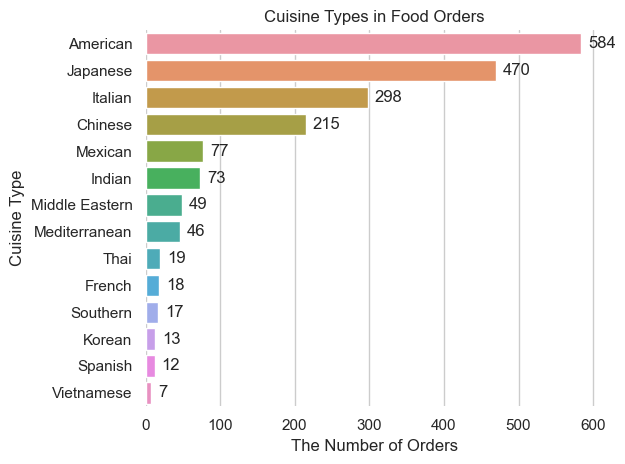

In [249]:
df_cuisine_type = pd.DataFrame(food["cuisine_type"].value_counts())
df_cuisine_type.reset_index(inplace=True)
df_cuisine_type.columns = ["Type", "Freq"]
df_cuisine_type = df_cuisine_type.sort_values(by="Freq", ascending=False)

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()
hbars = sns.barplot(x="Freq", y="Type", data=df_cuisine_type, orient='h')
ax.bar_label(ax.containers[0], padding = 5)
plt.title('Cuisine Types in Food Orders')
ax.set(xlabel="The Number of Orders", ylabel="Cuisine Type")

sns.despine(left=True, right = True , top = True, bottom=True)
fig.tight_layout()

In [251]:
df_day = pd.DataFrame(food["day_of_the_week"].value_counts())
df_day.reset_index(inplace=True)
df_day.columns = ["Day", "Freq"]
df_day = df_day.sort_values(by="Day", ascending=False)

In [252]:
restaurant = food[["restaurant_name"]]

count_restaurant = restaurant.groupby("restaurant_name").value_counts().reset_index(name="count")
count_top10 = count_restaurant.sort_values(by="count",ascending=False).head(10)
count_top10

,restaurant_name,count
136,Shake Shack,219
153,The Meatball Shop,132
21,Blue Ribbon Sushi,119
20,Blue Ribbon Fried Chicken,96
109,Parm,68
121,RedFarm Broadway,59
122,RedFarm Hudson,55
145,TAO,49
66,Han Dynasty,46
22,Blue Ribbon Sushi Bar & Grill,44


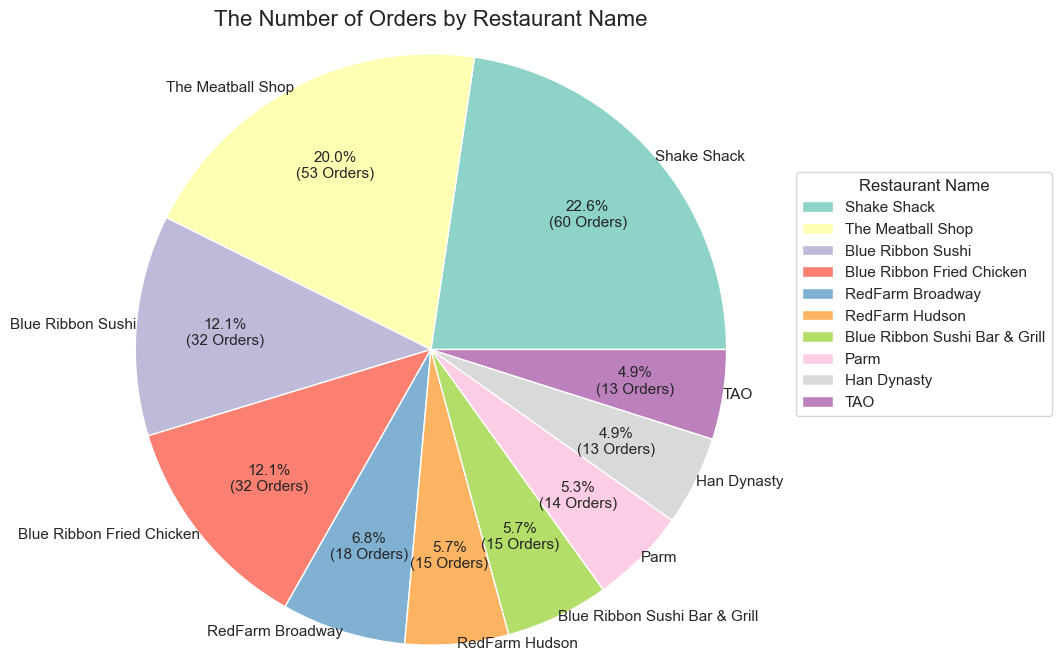

In [254]:
top10 = (count_top10["count"].sum()) / (count_restaurant["count"].sum())

plt.title(
    label="The Number of Orders by Restaurant Name", 
    fontdict={"fontsize":16},
    pad=100
)

plt.pie(top10_by_rate["count"], 
        labels=top10_by_rate["restaurant_name"],
        pctdistance = 0.7, 
        labeldistance = 1,
        autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(top10_by_rate["count"]):.0f} Orders)',
        textprops={"family": "Arial", "size": 11},
        radius = 2,
        colors=sns.color_palette('Set3')
        )
plt.legend(loc="best", bbox_to_anchor=(2.2,1), title="Restaurant Name")

In [152]:
# print ("The top 10 restaurants by order volume account for",round(top10*100,2),"% of",count_top10["count"].sum(),"orders in total.")

The top 10 restaurants by order volume account for 46.73 % of 887 orders in total.


The top 10 restaurants by order volume account for 46.73 % of 887 orders in total.

In [258]:
rate_by_restaurant = food[["restaurant_name","rating"]]
rate_by_restaurant = rate_by_restaurant[rate_by_restaurant['rating'].str.contains('\d')]

full_restaurant = rate_by_restaurant[rate_by_restaurant["rating"] == "5"]

top10_by_rate = full_restaurant.groupby("restaurant_name")["rating"].value_counts().reset_index(name="count")
top10_by_rate = top10_by_rate.sort_values(by="count",ascending=False).head(10)
top10_by_rate

,restaurant_name,rating,count
91,Shake Shack,5,60
103,The Meatball Shop,5,53
15,Blue Ribbon Sushi,5,32
14,Blue Ribbon Fried Chicken,5,32
81,RedFarm Broadway,5,18
82,RedFarm Hudson,5,15
16,Blue Ribbon Sushi Bar & Grill,5,15
75,Parm,5,14
46,Han Dynasty,5,13
98,TAO,5,13


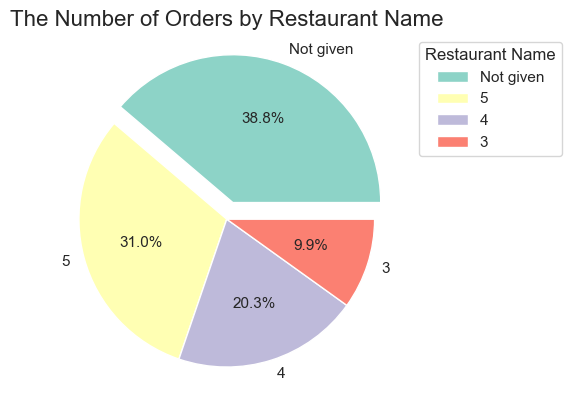

In [259]:
food_rating = pd.DataFrame(food["rating"].value_counts()).reset_index()

plt.title(label="The Number of Orders by Restaurant Name", 
    fontdict={"fontsize":16})

plt.pie(food_rating["rating"], 
        labels=food_rating["index"],
        pctdistance = 0.6, 
        labeldistance = 1.1,
        autopct=lambda x: f'{x:.1f}%',
        textprops={"family": "Arial", "size": 11},
        radius = 1,
        colors=sns.color_palette('Set3'),
        explode=[0.12, 0, 0, 0]
        )
plt.legend(loc="best", bbox_to_anchor=(1,1), title="Restaurant Name")
fig.tight_layout()

In [260]:
food["food_to_home_time"] = food[["food_preparation_time", "delivery_time"]].sum(axis=1, skipna=True)

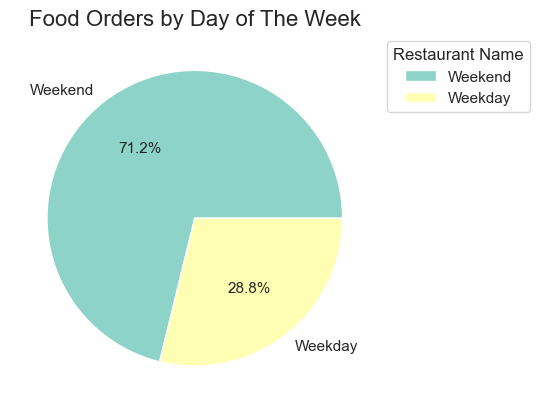

In [264]:
df_day = pd.DataFrame(food["day_of_the_week"].value_counts())
df_day.reset_index(inplace=True)
df_day.columns = ["Day", "Freq"]
df_day = df_day.sort_values(by="Day", ascending=False)
plt.title(label="Food Orders by Day of The Week", 
    fontdict={"fontsize":16})

plt.pie(df_day["Freq"], labels = df_day["Day"],
        pctdistance = 0.6, 
        labeldistance = 1.1,
        autopct=lambda x: f'{x:.1f}%',
        textprops={"family": "Arial", "size": 11},
        radius = 1,
        colors=sns.color_palette('Set3'),
        )
plt.legend(loc="best", bbox_to_anchor=(1,1), title="Restaurant Name")
fig.tight_layout()

Order volume is much higher on weekends (two days) than on weekdays (five days).

In [266]:
mean_rating = food[["cuisine_type", "rating"]].dropna()
mean_rating = mean_rating[mean_rating['rating'].str.contains('\d')]

mean_rating["rating"] = pd.to_numeric(mean_rating["rating"])
mean_rating = mean_rating.groupby("cuisine_type")["rating"].mean().reset_index()
mean_rating = mean_rating.sort_values('rating', ascending=[False])
mean_rating

,cuisine_type,rating
11,Spanish,4.833333
12,Thai,4.666667
3,Indian,4.540000
8,Mexican,4.416667
5,Japanese,4.373626
4,Italian,4.360465
1,Chinese,4.338346
10,Southern,4.307692
2,French,4.300000
0,American,4.298913


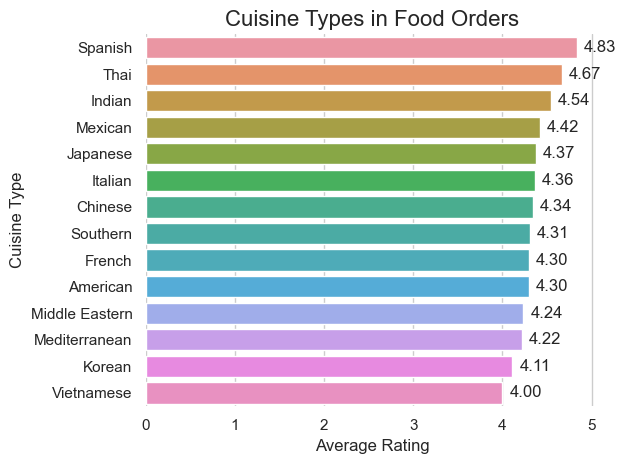

In [278]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()
sns.barplot(x="rating", y="cuisine_type", data=mean_rating)
ax.bar_label(ax.containers[0], padding = 5, fmt='%.2f')
plt.title('Cuisine Types in Food Orders', fontdict={"fontsize":16})
ax.set(xlabel="Average Rating", ylabel="Cuisine Type")

sns.despine(left=True, right = True , top = True, bottom=True)
fig.tight_layout()

Spanish, Thai, and Indian cuisines have the highest mean ratings, in that order.

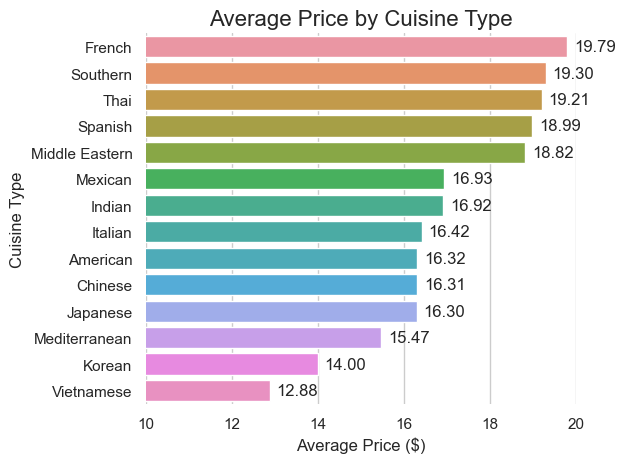

In [285]:
mean_price = food[["cuisine_type","cost_of_the_order"]]
mean_price_by_type = mean_price.groupby("cuisine_type")["cost_of_the_order"].mean().reset_index()
mean_price_by_type = mean_price_by_type.sort_values("cost_of_the_order", ascending=False)

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()
sns.barplot(x="cost_of_the_order", y="cuisine_type", data=mean_price_by_type)
ax.bar_label(ax.containers[0], padding = 5, fmt='%.2f')
plt.title("Average Price by Cuisine Type", fontdict={"fontsize":16})
ax.set(xlabel="Average Price ($)", ylabel="Cuisine Type", xlim=(10,20))

sns.despine(left=True, right=True, top=True, bottom=True)
fig.tight_layout()

French, Southern, Thai, Spanish and Middle Eastern foods are relatively high average price.

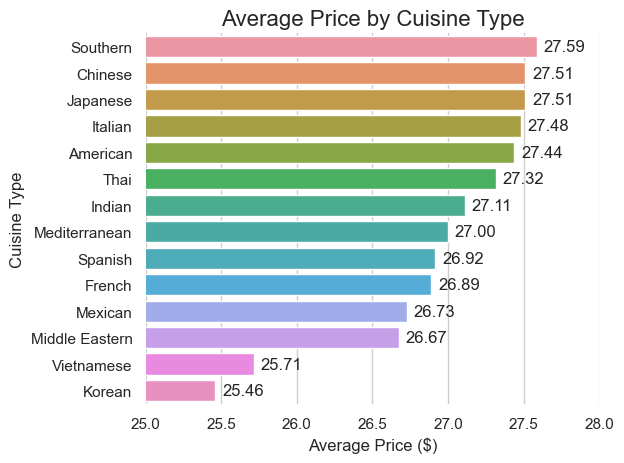

In [283]:
prep_time = food[["cuisine_type","food_preparation_time"]]
mean_prep_time = prep_time.groupby("cuisine_type")["food_preparation_time"].mean().reset_index()
mean_prep_time = mean_prep_time.sort_values("food_preparation_time",ascending=False)

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()
sns.barplot(x="food_preparation_time", y="cuisine_type", data=mean_prep_time)
ax.bar_label(ax.containers[0], padding = 5, fmt='%.2f')
plt.title("Average Price by Cuisine Type", fontdict={"fontsize":16})
ax.set(xlabel="Average Price ($)", ylabel="Cuisine Type", xlim=(25,28))

sns.despine(left=True, right=True, top=True, bottom=True)
fig.tight_layout()

There is little difference in cooking time between Korean and Vietnamese food, with both being faster than Southern food.

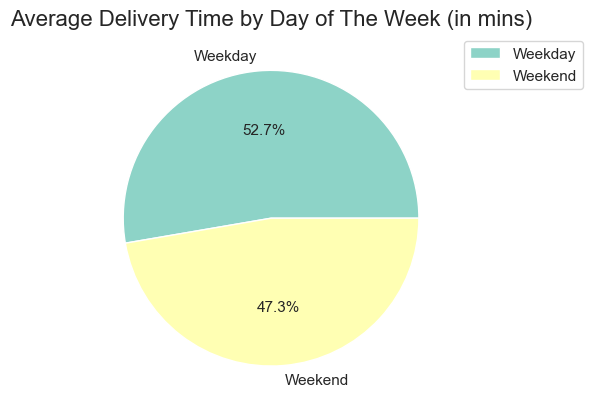

In [287]:
time_by_day = food[["day_of_the_week", "food_to_home_time"]]
mean_delivery = time_by_day.groupby("day_of_the_week")["food_to_home_time"].mean().reset_index()
mean_delivery["food_to_home_time"] = mean_delivery["food_to_home_time"].round(1)

plt.title(label="Average Delivery Time by Day of The Week (in mins)", 
    fontdict={"fontsize":16})

plt.pie(mean_delivery["food_to_home_time"], labels = mean_delivery["day_of_the_week"],
        pctdistance = 0.6, 
        labeldistance = 1.1,
        autopct=lambda x: f'{x:.1f}%',
        textprops={"family": "Arial", "size": 11},
        radius = 1,
        colors=sns.color_palette('Set3'),
        )
plt.legend(loc="best", bbox_to_anchor=(1,1))
fig.tight_layout()

Delivery time is approximately 5 minutes faster on weekends than on weekdays.
Also, 12.91 %  of restaurant orders take more than an hour to deliver.

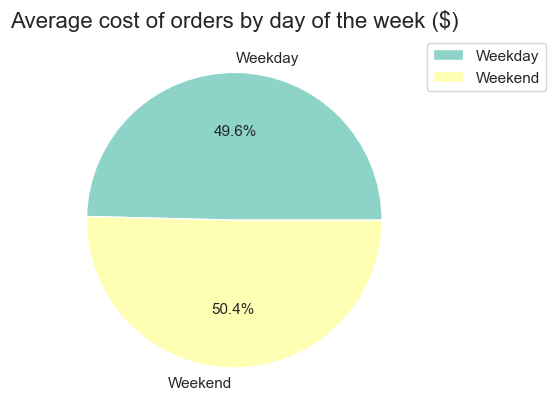

In [289]:
cost_by_week = food[["day_of_the_week", "cost_of_the_order"]]
mean_cost_week = cost_by_week.groupby("day_of_the_week")["cost_of_the_order"].mean().reset_index()
mean_cost_week["cost_of_the_order"] = mean_cost_week["cost_of_the_order"].round(2)

plt.title(label="Average cost of orders by day of the week ($)", 
    fontdict={"fontsize":16})

plt.pie(mean_cost_week["cost_of_the_order"], labels = mean_cost_week["day_of_the_week"],
        pctdistance = 0.6, 
        labeldistance = 1.1,
        autopct=lambda x: f'{x:.1f}%',
        textprops={"family": "Arial", "size": 11},
        radius = 1,
        colors=sns.color_palette('Set3'),
        )
plt.legend(loc="best", bbox_to_anchor=(1,1))
fig.tight_layout()

The difference in customer spending depending on the day of the week is small.

<AxesSubplot:>

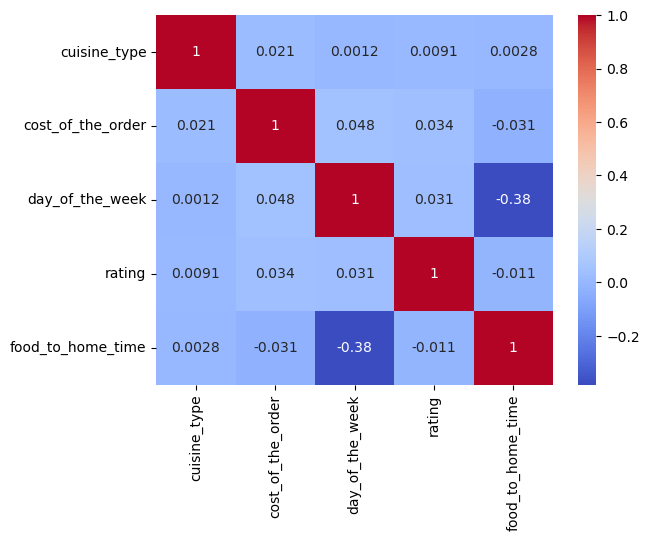

In [31]:
food_corr = food.copy()
food_corr = food_corr[food_corr['rating'].str.contains('\d')]
food_corr["rating"] = pd.to_numeric(food_corr["rating"])
food_corr.dropna(inplace=True)

food_corr = food_corr.iloc[:, [1,2,3,4,7]]

food_corr["day_of_the_week"] = pd.factorize(food_corr["day_of_the_week"])[0]
food_corr["cuisine_type"] = pd.factorize(food_corr["cuisine_type"])[0]

corr = food_corr.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)

## Conclusion

The analysis of food delivery data in NYC using Python revealed several interesting insights.
First of all, the top 10 restaurants with the highest orders accounted for 46.73% of the total orders, indicating that a few popular restaurants dominate the food delivery market. Moreover, these restaurants tend to have high ratings, suggesting that customers prefer to order from highly-rated restaurants.

Another surprising finding was that the order volume was significantly higher on weekends compared to weekdays. This may indicate that more people prefer to order food on weekends, possibly due to a lack of time or the desire to treat themselves after a busy week.
Furthermore, the analysis found that Spanish, Thai, and Indian cuisines have the highest mean ratings, indicating that customers tend to be more satisfied with these cuisines. However, it is important to note that 38.8% of customers do not give a star rating, which could indicate that many customers do not rate their satisfaction.

The cooking time for Korean and Vietnamese food was found to be remarkably short, with a difference of only two minutes compared to Southern food, which takes the longest. This suggests that there is no significant difference in cooking time between different cuisines.
Additionally, on weekends, the average time for food to reach customers was about five minutes shorter than during the week. This could be due to office workers doing delivery on weekends as a side job. However, it is also important to note that 12.91% of restaurants' foods were delivered after more than an hour.
Finally, the analysis found that American, Japanese, and Italian foods were the most popular foods for delivery, including Shake Shack burgers, The Meatball Shop, and Blue Ribbon Sushi. This could indicate that customers prefer fast-foods and sushi.
In conclusion, this analysis provides valuable insights into the food delivery market in NYC. However, it is important to note that the findings are based on a limited dataset especially in ratings. Hence, further research is needed to confirm these insights.